## 원-핫 인코딩(One-hot encoding)
- 원-핫 인코딩이란, 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고 다른 인덱스에는 0으로 표현하는 단어의 벡터 표현 방식이다.

In [2]:
from konlpy.tag import Okt

okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다.")
print(token)

['나', '는', '자연어', '처리', '를', '배운다', '.']


In [3]:
word2index = {}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5, '.': 6}


In [4]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

- 원-핫 인코딩의 한계
    - 단어의 개수가 늘어날수록 필요 저장 공간이 계속 늘어난다.
    - 저장 공간 뿐만 아니라 벡터의 차원도 계속 늘어난다.
    - 단어의 유사도를 표현하지 못한다.(유사성을 표현하지 못한다.)

## 워드투벡터(Word2Vec)
- 단어를 희소 표현이 아닌 밀집 표현으로 나타내는 것.
    - 희소 표현:[0, 0, 1, 0]
    - 밀집 표현:[0.2, 1.8, 1.1, -2.1]
---
#### CBOW(Continuous Bag of Words)
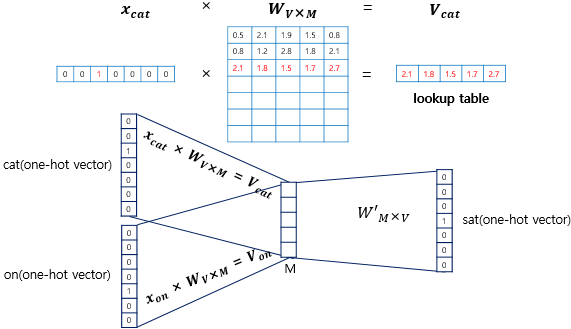

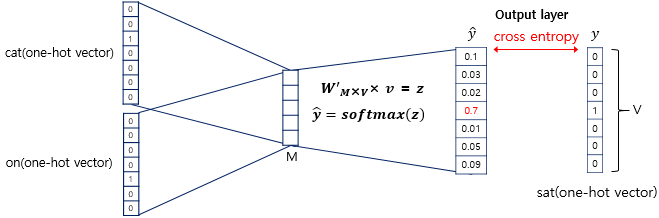
- 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
- 윈도우: 중간 단어를 예측하기 위해서 참고할 앞, 뒤 단어의 범위
- 슬라이딩 윈도우: 정해진 크기의 윈도우를 움직이면서 주변 단어와 중심 단어를 바꿔가며 학습의 데이터셋을 만드는 방법
- 입력은 원-핫 벡터의 형태
- v는 가중치가 곱해져 나온 벡터들이 투사층에서 만나 구해진 평균

#### Skip-gram
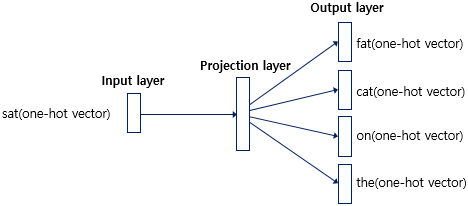

- CBOW와 반대로 중심 단어를 기준으로 주변 단어들을 예측

#### 네거티브 샘플링(Negative Sampling)
- 위에서 배운 모델들의 문제는 학습 속도가 느림(수많은 단어 집합이 다 계산됨.)
- 상관없는 단어들을 줄여나가며 마지막에 소프트맥스가 아닌 이진 분류로 계산한다.